In [1]:
# Imports
import pandas as pd
import csv
from datetime import date, timedelta
import folium
import requests
from folium import Marker
from folium.plugins import MarkerCluster
import math
import matplotlib.pyplot as plt
import seaborn as sns
from requests.auth import HTTPBasicAuth
import json
from pandas import json_normalize
import pandas
import numpy as np

In [2]:
#opens json data for vaccine administration for US states and territories
with open('vaccine_admin.json') as f:
    vaccine_admin_json=json.load(f)



In [3]:
vaccine_admin_json
vaccine_admin_json['vaccination_data'][1]['LongName']


'Alaska'

In [4]:
#formats the json data into a dataframe
vaccine_admin_df= vaccine_admin_json['vaccination_data']
us_vaccine_admin_df=json_normalize(vaccine_admin_df)

#removes the first row for the general US, unless wanted, I can put it back

us_vaccine_admin_df=us_vaccine_admin_df.iloc[1:,:]

#removes the first column which includes the date
us_vaccine_admin_df=us_vaccine_admin_df.iloc[:,1:]

us_vaccine_admin_df



,Location,ShortName,LongName,Census2019,date_type,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,...,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf
1,AK,AKA,Alaska,731545,Report,1125115,847207,153800,115811,323201,...,26282,15.6,36947,10.4,15901,21.2,NaN,NaN,NaN,NaN
2,AL,ALA,Alabama,4903185,Report,6999770,4732829,142760,96526,2049081,...,113302,9.1,134294,6.5,85455,13.2,NaN,NaN,NaN,NaN
3,AR,ARA,Arkansas,3017804,Report,4256950,3161353,141061,104757,1330606,...,75840,10.1,95807,7.2,56253,14.4,NaN,NaN,NaN,NaN
4,AS,ASA,American Samoa,55689,Report,68550,65441,123094,117512,17918,...,8,0.0,16,0.0,1,0.0,NaN,NaN,NaN,NaN
5,AZ,AZA,Arizona,7278717,Report,10410270,8578327,143023,117855,3396918,...,196536,10.1,234139,6.5,152772,14.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,VT,VTA,Vermont,623989,Report,1120670,946774,179598,151729,363314,...,34214,14.5,39009,9.4,28478,23.5,NaN,NaN,NaN,NaN
60,WA,WAA,Washington,7614893,Report,11999595,10055713,157581,132053,3733446,...,260093,11.8,316967,7.0,200854,18.6,NaN,NaN,NaN,NaN
61,WI,WIA,Wisconsin,5822434,Report,7923035,7141619,136078,122657,2683589,...,229763,12.7,278437,8.8,181242,19.4,NaN,NaN,NaN,NaN
62,WV,WVA,West Virginia,1792147,Report,3079635,1583779,171841,88373,702426,...,32630,7.2,39889,5.6,23079,8.7,NaN,NaN,NaN,NaN


In [5]:
us_vaccine_admin_df
us_vaccine_admin_df.drop(
            labels=['date_type','ShortName','Administered_Unk_Manuf','Distributed_Unk_Manuf','Series_Complete_Unk_Manuf',
            'Series_Complete_Unk_Manuf_18Plus','Series_Complete_Unk_Manuf_65Plus',
            'Series_Complete_Yes','Administered_65Plus_Entity','Series_Complete_Unk_Manuf_12Plus',
            'Administered_12Plus_Entity','Additional_Doses_Moderna','Additional_Doses_Pfizer',
            'Additional_Doses_Janssen','Additional_Doses_Unk_Manuf'],
            axis=1,
            inplace=True
            )

In [6]:
#removes us territories from dataframe
us_vaccine_admin_df.drop(
            labels=[4,6,11,
            14,16,20,
            29,33,48,
            50, 57, 58],
            axis=0,
            inplace=True
            )


In [7]:
#resets index
us_vaccine_admin_df=us_vaccine_admin_df.reset_index(drop=True)
us_vaccine_admin_df

,Location,LongName,Census2019,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,Administered_Pfizer,Administered_Janssen,...,Series_Complete_Janssen_12Plus,Count_70pct_vacc,additional_doses,Additional_Doses_Vax_Pct,Additional_Doses_50Plus,Additional_Doses_50Plus_Vax_Pct,Additional_Doses_18Plus,Additional_Doses_18Plus_Vax_Pct,Additional_Doses_65Plus,Additional_Doses_65Plus_Vax_Pct
0,AK,Alaska,731545,1125115,847207,153800,115811,323201,487694,35738,...,33358,NaN,37109,9.7,26282,15.6,36947,10.4,15901,21.2
1,AL,Alabama,4903185,6999770,4732829,142760,96526,2049081,2543054,140547,...,142587,NaN,134615,6.2,113302,9.1,134294,6.5,85455,13.2
2,AR,Arkansas,3017804,4256950,3161353,141061,104757,1330606,1726842,100890,...,98909,NaN,95994,6.7,75840,10.1,95807,7.2,56253,14.4
3,AZ,Arizona,7278717,10410270,8578327,143023,117855,3396918,4869225,296712,...,286585,NaN,234894,6.1,196536,10.1,234139,6.5,152772,14.7
4,CA,California,39512223,61020085,52869188,154433,133805,19711065,31240203,1903579,...,1890013,NaN,1381200,5.7,1079731,10.3,1378787,6.2,794340,16.5
5,CO,Colorado,5758736,8677815,7499427,150690,130227,2883078,4334110,276794,...,271938,NaN,279350,7.9,216933,14.2,278762,8.5,171100,23.7
6,CT,Connecticut,3565287,5924555,5265418,166173,147686,1892190,3162808,209168,...,208233,NaN,159353,6.3,144307,11.5,159158,6.8,120643,20.5
7,DC,District of Columbia,705749,1276265,1040743,180838,147466,381966,626950,31380,...,35164,NaN,20693,4.7,15012,9.1,20646,4.9,11016,14.8
8,DE,Delaware,973764,1618635,1268810,166225,130300,478217,737566,51555,...,51053,NaN,37414,6.4,33511,10.4,37360,6.8,27237,16.2
9,FL,Florida,21477737,34307395,27897250,159735,129889,10259692,16310153,1227187,...,1208341,NaN,892426,7.0,798104,11.2,890970,7.4,642853,16.6


In [8]:
#changes headers
us_vaccine_admin_df=us_vaccine_admin_df.rename(columns={
    'Location':'Abrev_Name',
    'LongName':'State',
    'Census2019': 'Total_Population',
    'Administered_Janssen':'Administered_J&J',
    'Administered_Dose1_Recip':'Administered_Dose1',
    'Administered_Dose1_Pop_Pct':'Administered_Dose1_Percentage',
    'Administered_Dose2_Pop_Pct':'Administered_Dose2_Percentage',
    'Administered_Dose1_Recip_18Plus':'Administered_Dose1_18Plus',
    'Administered_Dose1_Recip_18PlusPop_Pct':'Administered_Dose1_18Plus_Pop_Percentage',
    'Administered_Dose1_Recip_65Plus':'Administered_Dose1_65Plus',
    'Administered_Dose1_Recip_65PlusPop_Pct':'Administered_Dose1_65Plus_Pop_Percentage',
    'Distributed_Janssen':'Distributed_J&J',
    'Series_Complete_Janssen':'Series_Complete_J&J',
    'Series_Complete_Janssen_18Plus':'Series_Complete_J&J_18Plus',
    'Series_Complete_Janssen_65Plus':'Series_Complete_J&J_65Plus',
    'Series_Complete_18PlusPop_Pct':'Series_Complete_18PlusPop_Percentage',
    'Series_Complete_65PlusPop_Pct':'Series_Complete_65PlusPop_Percentage',
    'Census2019_12PlusPop':'12Plus_Population',
    'Administered_Dose1_Recip_12Plus':'Administered_Dose1_12Plus',
    'Administered_Dose1_Recip_12PlusPop_Pct':'Administered_Dose1_12Plus_Pop_Percentage',
    'Administered_Dose2_Recip_12Plus':'Administered_Dose2_12Plus',
    'Administered_Dose2_Recip_12PlusPop_Pct':'Administered_Dose2_12Plus_Pop_Percentge',
    'Series_Complete_12PlusPop_Pct':'Series_Complete_12PlusPop_Percentage',
    'Series_Complete_Janssen_12Plus':'Series_Complete_J&J_12Plus',
    'additional_doses':'Additional_Doses_Administered',
    'Additional_Doses_Vax_Pct':'Additional_Doses_Administered_Percentage',
    'Additional_Doses_50Plus_Vax_Pct':'Additional_Doses_50Plus_Percentage',
    'Additional_Doses_18Plus_Vax_Pct':'Additional_Doses_18Plus_Percentage',
    'Additional_Doses_65Plus_Vax_Pct':'Additional_Doses_65Plus_Percentage'})
us_vaccine_admin_df

,Abrev_Name,State,Total_Population,Doses_Distributed,Doses_Administered,Dist_Per_100K,Admin_Per_100K,Administered_Moderna,Administered_Pfizer,Administered_J&J,...,Series_Complete_J&J_12Plus,Count_70pct_vacc,Additional_Doses_Administered,Additional_Doses_Administered_Percentage,Additional_Doses_50Plus,Additional_Doses_50Plus_Percentage,Additional_Doses_18Plus,Additional_Doses_18Plus_Percentage,Additional_Doses_65Plus,Additional_Doses_65Plus_Percentage
0,AK,Alaska,731545,1125115,847207,153800,115811,323201,487694,35738,...,33358,NaN,37109,9.7,26282,15.6,36947,10.4,15901,21.2
1,AL,Alabama,4903185,6999770,4732829,142760,96526,2049081,2543054,140547,...,142587,NaN,134615,6.2,113302,9.1,134294,6.5,85455,13.2
2,AR,Arkansas,3017804,4256950,3161353,141061,104757,1330606,1726842,100890,...,98909,NaN,95994,6.7,75840,10.1,95807,7.2,56253,14.4
3,AZ,Arizona,7278717,10410270,8578327,143023,117855,3396918,4869225,296712,...,286585,NaN,234894,6.1,196536,10.1,234139,6.5,152772,14.7
4,CA,California,39512223,61020085,52869188,154433,133805,19711065,31240203,1903579,...,1890013,NaN,1381200,5.7,1079731,10.3,1378787,6.2,794340,16.5
5,CO,Colorado,5758736,8677815,7499427,150690,130227,2883078,4334110,276794,...,271938,NaN,279350,7.9,216933,14.2,278762,8.5,171100,23.7
6,CT,Connecticut,3565287,5924555,5265418,166173,147686,1892190,3162808,209168,...,208233,NaN,159353,6.3,144307,11.5,159158,6.8,120643,20.5
7,DC,District of Columbia,705749,1276265,1040743,180838,147466,381966,626950,31380,...,35164,NaN,20693,4.7,15012,9.1,20646,4.9,11016,14.8
8,DE,Delaware,973764,1618635,1268810,166225,130300,478217,737566,51555,...,51053,NaN,37414,6.4,33511,10.4,37360,6.8,27237,16.2
9,FL,Florida,21477737,34307395,27897250,159735,129889,10259692,16310153,1227187,...,1208341,NaN,892426,7.0,798104,11.2,890970,7.4,642853,16.6


In [9]:
#i tried to loop through dataframe and match to lists, using if statements, but it wouldn't match the columns to the lists
#i can get it to match by hard coding but not automatically
#if anyone knows how to get it to match the lists, it is easy to put it into the data frame as a new column
PST='CA|WA|NV'
HAST=['HI']
AST=['AK']
MST=['AR', 'CO', 'MT', 'NM', 'UT', 'WY']
CST=['AL','AR','IA', 'MN', 'MO', 'MS', 'NE','OK','WI']
EST=['CT', 'DE', 'GA', 'ME', 'MA', 'MI', 'NH', 'NJ', 'NY','NC', 'OH', 'PA', 'RI', 'SC', 'VT', 'VA', 'DC','WV']
PST_MST=['ID', 'OR']
EST_CST=['FL','IN','KY','TN']
CST_MST=['KS','TX', 'SD']
Timezone=[]
states=us_vaccine_admin_df['Location']

for state in states:
        


SyntaxError: unexpected EOF while parsing (<ipython-input-9-b20f0e0d2c73>, line 17)

In [10]:
# Population Data
populationData = pd.read_csv('Resources/2019_Census_US_Population_Data_By_State_Lat_Long.csv')

# Get the most recent date for filtering
freshDate = date.today() - timedelta(days=1)
freshDate = date.strftime(freshDate,"%Y%m%d")
freshDate = freshDate[0:4] + "-" + freshDate[4:6] + "-" + freshDate[6:8]



In [116]:
# Vaccination data, for most recent date
vaccinationData = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')
vaccinationByLocation = vaccinationData.loc[(vaccinationData.date == freshDate)][["location", "people_vaccinated"]]

# Vaccination and population data
vaccinationAndPopulationByLocation = pd.merge(populationData, vaccinationByLocation, left_on='STATE',right_on='location').drop(columns="location")

# Calculate percentage vaccinated by state
vaccinationAndPopulationByLocation["percent_vaccinated"] = vaccinationAndPopulationByLocation["people_vaccinated"] / vaccinationAndPopulationByLocation["POPESTIMATE2019"]

vaccinationAndPopulationByLocation

,STATE,POPESTIMATE2019,lat,long,people_vaccinated,percent_vaccinated
0,Alabama,4903185,32.377716,-86.300568,2637734.0,0.537963
1,Alaska,731545,58.301598,-134.420212,429352.0,0.586911
2,Arizona,7278717,33.448143,-112.096962,4410454.0,0.605938
3,Arkansas,3017804,34.746613,-92.288986,1717255.0,0.569041
4,California,39512223,38.576668,-121.493629,29081847.0,0.736022
5,Colorado,5758736,39.739227,-104.984856,3850188.0,0.668582
6,Connecticut,3565287,41.764046,-72.682198,2781466.0,0.780152
7,Delaware,973764,39.157307,-75.519722,664438.0,0.682340
8,District of Columbia,705749,38.895110,-77.036370,515178.0,0.729973
9,Florida,21477737,30.438118,-84.281296,14669594.0,0.683014


In [93]:
#Which vaccine was distributed the most?

In [36]:
manufacturer_df=us_vaccine_admin_df.loc[:,['State','Administered_Moderna','Administered_Pfizer', 'Administered_J&J']]

In [37]:
manufacturer_df =manufacturer_df.set_index(['State'])
manufacturer_df 

,Administered_Moderna,Administered_Pfizer,Administered_J&J
State,,,
Alaska,323201,487694,35738
Alabama,2049081,2543054,140547
Arkansas,1330606,1726842,100890
Arizona,3396918,4869225,296712
California,19711065,31240203,1903579
Colorado,2883078,4334110,276794
Connecticut,1892190,3162808,209168
District of Columbia,381966,626950,31380
Delaware,478217,737566,51555


In [67]:
sum_moderna=(manufacturer_df["Administered_Moderna"]).sum()
sum_moderna=(manufacturer_df["Administered_Moderna"]).sum() 

In [45]:
sum_moderna

151081384

In [46]:
sum_pfizer=(manufacturer_df["Administered_Pfizer"]).sum()
sum_pfizer=(manufacturer_df["Administered_Pfizer"]).sum()   

In [47]:
sum_pfizer

236557955

In [49]:
sum_jj=(manufacturer_df["Administered_J&J"]).sum()
sum_jj=(manufacturer_df["Administered_J&J"]).sum()   

In [50]:
sum_jj

15008617

In [81]:
data = [['Administered_Moderna', 151081384], ['Administered_Pfizer', 236557955], ['Administered_J&J', 15008617]]
df = pd.DataFrame(data, columns = ['Vaccine Type', 'Total'])
df

,Vaccine Type,Total
0,Administered_Moderna,151081384
1,Administered_Pfizer,236557955
2,Administered_J&J,15008617


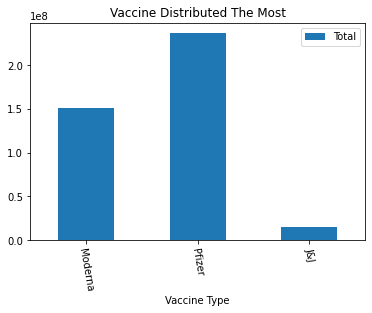

In [97]:
data = {"Vaccine Type":["Moderna", "Pfizer", "J&J"],

        "Total":[151081384,236557955,15008617]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Vaccine Type", y="Total", rot=1000, title="Vaccine Distributed The Most");


In [98]:
#Which population according to age group has a higher percentage of people vaccinated? 

manufacturer_df=us_vaccine_admin_df.loc[:,['State','Additional_Doses_50Plus_Percentage','Additional_Doses_18Plus_Percentage','Additional_Doses_65Plus_Percentage']]

In [99]:
manufacturer_df =manufacturer_df.set_index(['State'])
manufacturer_df 

,Additional_Doses_50Plus_Percentage,Additional_Doses_18Plus_Percentage,Additional_Doses_65Plus_Percentage
State,,,
Alaska,15.6,10.4,21.2
Alabama,9.1,6.5,13.2
Arkansas,10.1,7.2,14.4
Arizona,10.1,6.5,14.7
California,10.3,6.2,16.5
Colorado,14.2,8.5,23.7
Connecticut,11.5,6.8,20.5
District of Columbia,9.1,4.9,14.8
Delaware,10.4,6.8,16.2


In [124]:
Additional_Doses_18Plus_Percentage=(manufacturer_df["Additional_Doses_18Plus_Percentage"]).max()
Additional_Doses_18Plus_Percentage=(manufacturer_df["Additional_Doses_18Plus_Percentage"]).max() 

In [125]:
Additional_Doses_18Plus_Percentage

10.4

In [126]:
Additional_Doses_50Plus_Percentage=(manufacturer_df["Additional_Doses_50Plus_Percentage"]).max()
Additional_Doses_50Plus_Percentage=(manufacturer_df["Additional_Doses_50Plus_Percentage"]).max() 

In [127]:
Additional_Doses_50Plus_Percentage

15.6

In [128]:
Additional_Doses_65Plus_Percentage=(manufacturer_df["Additional_Doses_65Plus_Percentage"]).max()
Additional_Doses_65Plus_Percentage=(manufacturer_df["Additional_Doses_65Plus_Percentage"]).max() 

In [129]:
Additional_Doses_65Plus_Percentage

23.7

In [131]:
data = [['Additional_Doses_18Plus_Percentage', 10.4], ['Additional_Doses_50Plus_Percentage', 15.6], ['Additional_Doses_65Plus_Percentage', 23.7]]
df = pd.DataFrame(data, columns = ['Age Group', 'Percentage Total'])
df

,Age Group,Percentage Total
0,Additional_Doses_18Plus_Percentage,10.4
1,Additional_Doses_50Plus_Percentage,15.6
2,Additional_Doses_65Plus_Percentage,23.7


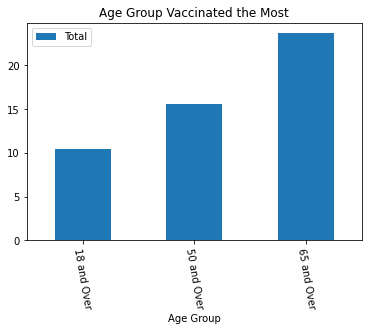

In [134]:
data = {"Age Group":["18 and Over", "50 and Over", "65 and Over"],

        "Total":[10.4,15.6,23.7]

        };

# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data);

 

# Draw a vertical bar chart

dataFrame.plot.bar(x="Age Group", y="Total", rot=1000, title="Age Group Vaccinated the Most");
